# Financial Planning with APIs and Simulations

In this single notebook, we will show two financial analysis tools:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

We use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [123]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


from datetime import date
import datetime

#To work with weekdays
from pandas.tseries.offsets import BDay

# To work with U.S.A. business days instead of weekdays
# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay


%matplotlib inline

In [72]:
# Load the environment variables from the .env file
# by calling the load_dotenv function
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Part 1: Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section we determine the current value of a member’s cryptocurrency wallet. We collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, we assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, we complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [73]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [74]:
# The monthly amount for the member's household income
monthly_income=12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [75]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [76]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18771956,
            "id": 1,
            "last_updated": 1627714478,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 778871055474,
                    "percent_change_1h": 0.316675369644735,
                    "percent_change_24h": 4.25104711598495,
                    "percent_change_7d": 24.0783867960922,
                    "percentage_change_1h": 0.316675369644735,
                    "percentage_change_24h": 4.25104711598495,
                    "percentage_change_7d": 24.0783867960922,
                    "price": 41511.0,
                    "volume_24h": 38435608384
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18771956,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [77]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response =requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 116911277,
            "id": 1027,
            "last_updated": 1627714492,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 284046103489,
                    "percent_change_1h": 0.151947679532222,
                    "percent_change_24h": 1.19158227010518,
                    "percent_change_7d": 14.8801896581194,
                    "percentage_change_1h": 0.151947679532222,
                    "percentage_change_24h": 1.19158227010518,
                    "percentage_change_7d": 14.8801896581194,
                    "price": 2432.19,
                    "volume_24h": 23516125911
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116911277,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [78]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response ['data']['1']['quotes']['USD']['price']

# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of BTC & ETH
print(f"The price of Bitcoin is: ${btc_price:,.2f}") 

print(f"The price of Ethelnet is: ${eth_price:,.2f}") 


The price of Bitcoin is: $41,511.00
The price of Ethelnet is: $2,432.19


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [79]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f" Value of the Bitcoin holding: ${btc_value:,.2f}")


 Value of the Bitcoin holding: $49,813.20


In [80]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f" Value of the Ethelnet holding: ${eth_value:,.2f}")


 Value of the Ethelnet holding: $12,890.61


In [81]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f" Cryptocurrency Balance: ${total_crypto_wallet:,.2f}" )


 Cryptocurrency Balance: $62,703.81


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK



In this section, we determine the current value of a member’s stock and bond holdings. We make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, we complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

#### Review the total number of shares held in both (SPY) and (AGG).

In [82]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key. -- followed from previous section.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [83]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca=tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [84]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers=['SPY','AGG']

# Set timeframe to 1D 
timeframe='1D'

#today_date=date.today() ## This if only date without tiome is needed
#print(today_date)

today = date.today()
prior_week_day=today - BDay(1)

# TO CONSIDER FOR AMERICAN BUSINESS DAYS
# US_BUSINESS_DAY = CustomBusinessDay(calendar=USFederalHolidayCalendar())
# prior_business_day = today - 1*US_BUSINESS_DAY
# print(yesterday)

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
start_date=pd.Timestamp(prior_week_day,tz='America/New_York').isoformat()
end_date  =pd.Timestamp(prior_week_day,tz='America/New_York').isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [85]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
tickers_prices=alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
tickers_prices.head()


AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-07-30 00:00:00-04:00  116.36  116.485  116.3532  116.45  4859650  437.91   

                                                             
                             high     low   close    volume  
time                                                         
2021-07-30 00:00:00-04:00  440.06  437.77  438.49  56594282

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [86]:
# Access the closing price for AGG & SPY from the Alpaca DataFrame
agg_close_price = tickers_prices["AGG"]["close"][0]
spy_close_price = tickers_prices["SPY"]["close"][0]

# Print the AGG and SPY closing price
print(f"Price of the Bond ETF:   ${agg_close_price} - iShares Core US Aggregate Bond ETF")
print(f"Price of the Equity ETF: ${spy_close_price} - SPDR S&P 500 ETF Trust")


Price of the Bond ETF:   $116.45 - iShares Core US Aggregate Bond ETF
Price of the Equity ETF: $438.49 - SPDR S&P 500 ETF Trust


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [87]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

In [88]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

In [89]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of Stocks and Bonds instruments in the portfolio is: ${total_stocks_bonds:,.2f}" )


The current balance of Stocks and Bonds instruments in the portfolio is: $71,523.90


In [90]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

#PRINTOUT FULL PORTFOLIO AND ASSET ALLOCATION
print("**************************************************************************************")
print(f"The current balance and asset allocation of your portfolio is:\n\n")
print(f" Stocks:                 ${spy_value:,.2f}     {spy_value/total_portfolio*100:.2f}%" )
print(f" Bonds:                  ${agg_value:,.2f}     {agg_value/total_portfolio*100:.2f}%" )

# Print current cryptocurrency wallet balance
print(f" Cryptocurrency wallet:  ${total_crypto_wallet:,.2f}     {total_crypto_wallet/total_portfolio*100:.2f}%")
print ("                         -----------   --------")
# Print current total portfolio balance
print(f"Total portfolio balance: ${total_portfolio:,.2f}    100%\n\n" )
print(f"Balance as of {start_date}")
print("**************************************************************************************")

**************************************************************************************
The current balance and asset allocation of your portfolio is:


 Stocks:                 $48,233.90     35.93%
 Bonds:                  $23,290.00     17.35%
 Cryptocurrency wallet:  $62,703.81     46.71%
                         -----------   --------
Total portfolio balance: $134,227.71    100%


Balance as of 2021-07-30T00:00:00-04:00
**************************************************************************************


### Evaluate the Emergency Fund

In this section, we use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, we complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [91]:
# Consolidate financial assets data into a Python list
savings_data=[total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[62703.807, 71523.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [92]:
# Create a Pandas DataFrame called savings_df 
savings_df=pd.DataFrame(savings_data, index=["crypto", "stock/bond"], columns=["amount"])

# Display the savings_df DataFrame
savings_df


,amount
crypto,62703.807
stock/bond,71523.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

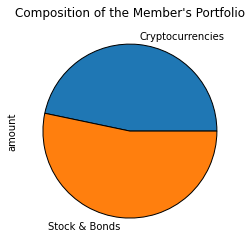

In [93]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
ax=savings_df.plot.pie(
    y="amount"
    ,title= "Composition of the Member's Portfolio"
    ,legend=False
    ,labels=["Cryptocurrencies","Stock & Bonds"]
    ,wedgeprops={'edgecolor':"black"}
)
#ax.legend(loc="center right")

#### Step 4: Using Python, determining if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, we implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [94]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Created a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [95]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
print(f"Your current portfolio balance is: ${total_portfolio:,.2f}.")
print(f"The Emergency Fund Goal Value is : ${emergency_fund_value:,.0f}, which corresponds to 3 times your monthly income.")

if total_portfolio > emergency_fund_value:
    print(f"Congratulations!!! You have enough money in this fund to cover an emergency")

elif abs(emergency_fund_value-total_portfolio)<0.01:
    print(f"Congratulations!! You have reached the importante financial goal of having enough savings to cover an emergency. Well done!")
            
else:
    print(f"You are ${emergency_fund_value-total_portfolio:,.2f} away from reaching the goal of funding your emergency fund. Keep up with your savings!!") 


Your current portfolio balance is: $134,227.71.
The Emergency Fund Goal Value is : $36,000, which corresponds to 3 times your monthly income.
Congratulations!!! You have enough money in this fund to cover an emergency


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [96]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
pro_date= datetime.datetime.now() - datetime.timedelta(days=3*365)

alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')
alpaca=tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version="v2")

start_date_mc=pd.Timestamp(pro_date, tz='America/New_York').isoformat()
end_date_mc=pd.Timestamp(datetime.datetime.now(), tz='America/New_York').isoformat()

In [97]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Set number of rows to 1000 to retrieve the maximum amount of rows
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
montecarlo_prices_df=alpaca.get_barset(
    tickers
    ,timeframe
    ,start=start_date_mc
    ,end=end_date_mc
    ,limit=1000
).df


# Display both the first and last five rows of the DataFrame
display(montecarlo_prices_df.head())
display(montecarlo_prices_df.tail())


AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2018-08-01 00:00:00-04:00  105.55  105.7600  105.512  105.69  3896190.0   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.73  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.93  2286629.0   
2018-08-06 00:00:00-04:00  106.03  106.1100  106.000  106.03  2974758.0   
2018-08-07 00:00:00-04:00  105.97  105.9700  105.825  105.84  2368151.0   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2018-08-01 00:00:00-04:00  281.56  282.13  280.1315  280.92  40627557  
2018-08-02 00:00:00-04:00  279.38  282.58  279.1600  282.34  42491022  
2018-08-03 00:00:00-04:00  282.53  283.65  282.3300  283.64  34485363  
2018-08-06 00:00:00-04:00  283.56  284.99  283.2015  284.68  29906355  
2018-08-07 00:00:00-04:00  285.39  286.01  285.2400  285.54  32455420

AGG                                        \
                             open     high       low   close     volume   
time                                                                      
2021-07-26 00:00:00-04:00  116.30  116.330  116.0850  116.11  7028009.0   
2021-07-27 00:00:00-04:00  116.35  116.400  116.2727  116.39  4669859.0   
2021-07-28 00:00:00-04:00  116.24  116.490  116.1400  116.48  5189696.0   
2021-07-29 00:00:00-04:00  116.29  116.360  116.2250  116.28  5216456.0   
2021-07-30 00:00:00-04:00  116.36  116.485  116.3532  116.45  4859650.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-07-26 00:00:00-04:00  439.31  441.03  439.26  440.99  40155852  
2021-07-27 00:00:00-04:00  439.91  439.94  435.99  439.00  61032234  
2021-07-28 00:00:00-04:00  439.68  440.30  437.31  438.84  47642330  
2021-07-29 00:00:00-04:00  439.83  441.80  439.81  440.67  40930880  
2021-07-30 00:00:00-04:00  437.91  440.06  437.77  438.49  56594282

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [98]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_years=MCSimulation(
    portfolio_data=montecarlo_prices_df, 
    weights=[.40,.60], 
    num_simulation=500, 
    num_trading_days=252*30)

# Review the simulation input data
MC_30_years.portfolio_data.head()


AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2018-08-01 00:00:00-04:00  105.55  105.7600  105.512  105.69  3896190.0   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.73  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.93  2286629.0   
2018-08-06 00:00:00-04:00  106.03  106.1100  106.000  106.03  2974758.0   
2018-08-07 00:00:00-04:00  105.97  105.9700  105.825  105.84  2368151.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2018-08-01 00:00:00-04:00          NaN  281.56  282.13  280.1315  280.92   
2018-08-02 00:00:00-04:00     0.000378  279.38  282.58  279.1600  282.34   
2018-08-03 00:00:00-04:00     0.001892  282.53  283.65  282.3300  283.64   
2018-08-06 00:00:00-04:00     0.000944  283.56  284.99  283.2015  284.68   
2018-08-07 00:00:00-04:00    -0.001792  285.39  286.01  285.2400  285.54   

                                                  
                             volume daily_return  
time                                              
2018-08-01 00:00:00-04:00  40627557          NaN  
2018-08-02 00:00:00-04:00  42491022     0.005055  
2018-08-03 00:00:00-04:00  34485363     0.004604  
2018-08-06 00:00:00-04:00  29906355     0.003667  
2018-08-07 00:00:00-04:00  32455420     0.003021

In [99]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000640,1.011698,1.005952,1.007778,0.990697,0.992741,1.009409,0.989334,1.008591,0.989976,...,0.999139,1.001943,1.012491,1.001215,0.992620,0.998855,0.983952,0.989519,0.996592,1.008439
2,0.990389,1.031030,1.011439,1.003075,0.989380,0.989680,1.017558,0.972833,1.019798,0.995027,...,0.985477,1.007826,1.011279,0.997454,1.002813,0.991638,0.975816,0.988800,0.983416,1.002559
3,0.992131,1.033433,1.018058,1.009606,0.994629,1.002698,1.008312,0.977741,1.027188,0.990464,...,0.997160,1.008503,1.013222,1.008778,1.001954,0.986527,0.984560,0.978170,0.982070,1.000622
4,0.986971,1.030070,1.019407,1.011767,0.983033,0.999383,1.002330,0.977777,1.041300,0.993427,...,1.009635,0.996199,1.009952,1.001671,0.991925,0.996136,0.980635,0.983769,0.981109,1.008746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.658477,13.594163,109.448278,103.554315,42.647131,60.064436,29.913813,19.395670,38.983896,20.728749,...,21.662067,31.560824,5.678407,24.232268,15.711061,47.401662,17.148828,29.247005,13.518714,34.557901
7557,15.374659,13.661843,108.483354,103.377211,42.299982,60.661060,29.762691,19.404496,38.372433,20.936603,...,21.965735,31.399552,5.675448,24.146219,15.775203,47.216017,16.878884,29.428654,13.497794,35.129508
7558,15.580512,13.671788,108.997254,103.005825,42.603925,62.427929,29.774072,19.374240,38.553449,21.102670,...,22.065769,31.492682,5.689980,24.255084,15.790296,47.553167,17.013310,29.298712,13.521906,34.798075
7559,15.752048,13.481209,110.459612,102.478063,43.297799,62.334215,30.089277,19.147895,38.400380,21.090250,...,21.902619,31.645760,5.635651,24.351524,16.092085,46.885349,16.871924,29.408797,13.588059,34.623290


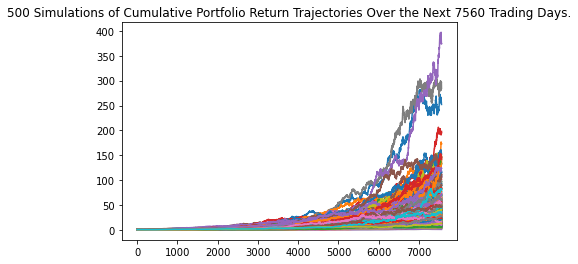

In [100]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_years.plot_simulation();


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

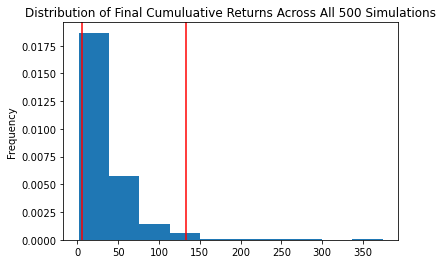

In [101]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_years.plot_distribution();


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [102]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_years_statistics = MC_30_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
display(MC_30_years_statistics)

count           500.000000
mean             36.367198
std              35.753758
min               1.468413
25%              16.492604
50%              26.170270
75%              43.665415
max             374.312417
95% CI Lower      5.575601
95% CI Upper    133.697109
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [103]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Stock and bonds current balance in the portfolio: ${total_stocks_bonds:,.2f}" )

Stock and bonds current balance in the portfolio: $71,523.90


In [104]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = total_stocks_bonds * MC_30_years_statistics[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * MC_30_years_statistics[9]

# Print the result of your calculations
print(f"""Your investment in stocks and bonds amount after 30 years is expected to be in the following range: 
${ci_lower_thirty_cumulative_return:,.0f} to ${ci_upper_thirty_cumulative_return:,.0f} with a 95% confidence. 
This is based on a Montecarlo Simulation over 30 years, using data of the last 3 years, assuming the past can help in predicting future results.""" )

Your investment in stocks and bonds amount after 30 years is expected to be in the following range: 
$398,789 to $9,562,539 with a 95% confidence. 
This is based on a Montecarlo Simulation over 30 years, using data of the last 3 years, assuming the past can help in predicting future results.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [105]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.¡
# Run 500 samples.
MC_10_years=MCSimulation(
    portfolio_data=montecarlo_prices_df
    ,weights=[0.2, 0.8]
    ,num_simulation=500
    ,num_trading_days=252*10
)

# Review the simulation input data
MC_10_years.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2018-08-01 00:00:00-04:00  105.55  105.7600  105.512  105.69  3896190.0   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.73  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.93  2286629.0   
2018-08-06 00:00:00-04:00  106.03  106.1100  106.000  106.03  2974758.0   
2018-08-07 00:00:00-04:00  105.97  105.9700  105.825  105.84  2368151.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2018-08-01 00:00:00-04:00          NaN  281.56  282.13  280.1315  280.92   
2018-08-02 00:00:00-04:00     0.000378  279.38  282.58  279.1600  282.34   
2018-08-03 00:00:00-04:00     0.001892  282.53  283.65  282.3300  283.64   
2018-08-06 00:00:00-04:00     0.000944  283.56  284.99  283.2015  284.68   
2018-08-07 00:00:00-04:00    -0.001792  285.39  286.01  285.2400  285.54   

                                                  
                             volume daily_return  
time                                              
2018-08-01 00:00:00-04:00  40627557          NaN  
2018-08-02 00:00:00-04:00  42491022     0.005055  
2018-08-03 00:00:00-04:00  34485363     0.004604  
2018-08-06 00:00:00-04:00  29906355     0.003667  
2018-08-07 00:00:00-04:00  32455420     0.003021

In [106]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009376,0.985676,0.986459,1.005485,0.991827,1.000507,1.003967,1.013165,0.990598,0.987238,...,1.013917,0.985571,0.993012,1.009907,0.988402,0.999230,0.995544,1.012028,0.999478,0.991124
2,1.001235,0.981372,0.985401,1.025480,0.988486,0.994088,1.001568,1.028725,0.981920,0.993457,...,1.010284,0.987849,1.011951,1.010584,0.996194,0.992874,0.997941,1.039602,1.015870,0.983399
3,0.991760,0.985156,0.980911,1.018549,0.975640,0.995039,1.003633,1.048100,0.974959,0.996982,...,1.019572,0.969065,1.013696,1.015075,0.990704,0.998334,0.985850,1.048611,1.028189,0.981026
4,0.999568,0.990778,0.985127,1.029739,0.950178,0.995637,0.997498,1.051040,0.954681,1.003834,...,0.992355,0.964707,1.012678,1.011692,0.976129,0.986876,0.976764,1.059437,1.023203,0.970078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.143908,1.767203,1.386532,3.889437,6.604344,10.274771,3.518312,6.659280,6.666416,1.317549,...,1.906170,6.673811,2.983602,6.581912,2.842795,3.150251,6.055923,8.896762,2.127801,6.438126
2517,2.205670,1.751712,1.399927,3.858859,6.655856,10.400998,3.550986,6.708586,6.727908,1.296728,...,1.898026,6.537367,2.976763,6.590930,2.863395,3.183978,6.118324,8.801013,2.125854,6.470957
2518,2.192960,1.748997,1.357698,3.844405,6.623135,10.219907,3.464701,6.724581,6.857235,1.287286,...,1.931806,6.552356,2.976964,6.665301,2.910309,3.139313,5.983101,8.910344,2.101205,6.540596
2519,2.170097,1.754476,1.356253,3.871062,6.645377,10.303136,3.543854,6.729294,6.814251,1.276365,...,1.958461,6.514577,2.968832,6.741002,2.987314,3.175308,6.029256,8.838973,2.114137,6.581103


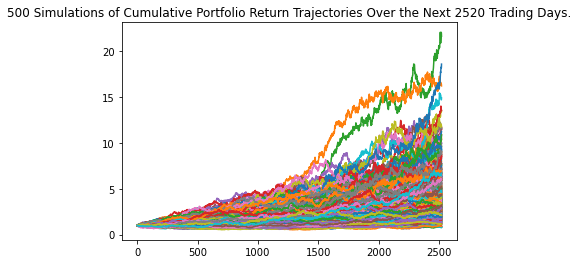

In [107]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_years.plot_simulation();


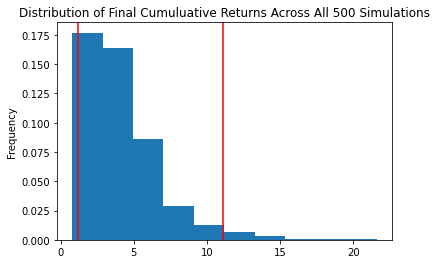

In [108]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_years.plot_distribution();


In [130]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_years_statistics=MC_10_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_10_years_statistics

count           500.000000
mean              4.171342
std               2.655049
min               0.783886
25%               2.269796
50%               3.475192
75%               5.274989
max              21.591964
95% CI Lower      1.187018
95% CI Upper     11.063858
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Stock and bonds current balance in the portfolio: ${total_stocks_bonds:,.2f}" )

In [110]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = summary_MC_10_years[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = summary_MC_10_years[9]*total_stocks_bonds

# Print the result of your calculations
print(f"""Your investment in bonds and stocks amount after 30 years is expected to be in the following range: 
${ci_lower_ten_cumulative_return:,.0f} and ${ci_upper_ten_cumulative_return:,.0f} with a 95% confidence. 
This is based on a Montecarlo Simulation over 30 years, using data of the last 3 years, assuming the past can help in predicting future results.""" )


Your investment in bonds and stocks amount after 30 years is expected to be in the following range: 
$84,900 and $791,330 with a 95% confidence. 
This is based on a Montecarlo Simulation over 30 years, using data of the last 3 years, assuming the past can help in predicting future results.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** The results we have developed in this exercise are projecting 10 and 30 years over a history of only 3 years. Then, it is not possible to get to a really valid conclusion. The market will probaly change very differently in the next ten and thirty years than it had on the recent 3 years that includes a pandemic. 

    That said, considering this as an academic excersice, I think we can draw some conclusiones in assessing whether a 10 years riskier portfolio could reach a potencial growth comparable to a 30 years investment in a less risky portfolio. 
    
    The answer would be no, based on the Montecarlo Simulations. The results show that incrementing the risk of the portfolio for 10 years does not compensate for the compounding effect of returns in 30 years. The maximum accumulated simulated return of the 10 year scenario (20x) is close (but still less!) than the median of the 30 year simulated outcomes (26x). That means that even the best case scenario simulated for 10 years will get under the 50% of the simulated 30 year outcomes accumulated returns. 
    
    The portfolio sleeve balances implied by the simulations appear high due to the good market performance of the last 3 years. However, assuming that 30 years is the time necesary to achieve the goal of retirement with a 60% Stocks/40% Bonds balance portfolio, then 10 years would not be enough to generate those levels of retirement savings with a portfolio of 80%/20%, unless the person dramatically concede in reducing his/her expectation of savings needed at the moment of retirement.
    
   

In [133]:
print(f"30 years horizon: ${ci_lower_thirty_cumulative_return:,.0f} to ${ci_upper_thirty_cumulative_return:,.0f}")
print(f"10 years horizon:  ${ci_lower_ten_cumulative_return:,.0f} to   ${ci_upper_ten_cumulative_return:,.0f} ")

30 years horizon: $398,789 to $9,562,539
10 years horizon:  $84,900 to   $791,330 
